In [2]:
import sys
sys.path.append('..')
import tensorflow as tf
tf.enable_eager_execution() 
import utils.dataset_gen as dsg
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Get data

In [5]:
ds = dsg.office31_datasets('A','D') #, lambda x: tf.compat.v2.keras.applications.vgg16.preprocess_input(x, mode='tf'))

## Visualise some samples

In [3]:
def show_batch(image_batch, label_batch, batch_size=15):
    plt.figure(figsize=(10,10))
    CLASS_NAMES = np.array(dsg.office31_class_names())
    for n in range(batch_size):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [4]:
si = iter(dsg.prep_ds_train(ds['source']['train']['ds']))

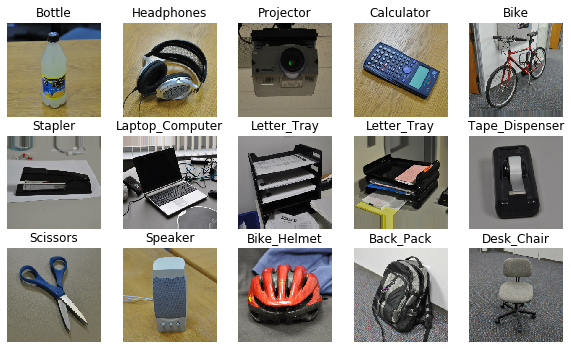

In [5]:
image_batch, label_batch = next(si)
show_batch(image_batch.numpy(), label_batch.numpy())

In [6]:
ti = iter(dsg.prep_ds_train(ds['target']['train']['ds']))

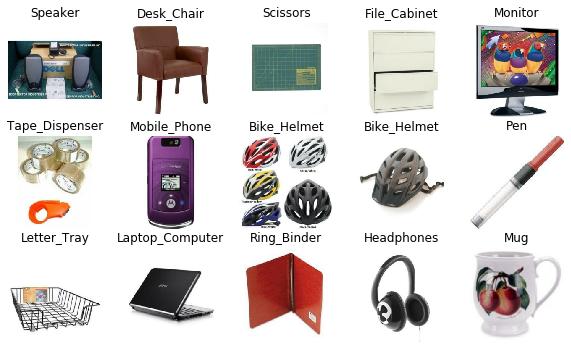

In [7]:
image_batch, label_batch = next(ti)
show_batch(image_batch.numpy(), label_batch.numpy())

## Check that combi dataset works

In [9]:
ds_combo = dsg.da_pair_dataset(source_ds=ds['source']['train']['ds'], 
                                   target_ds=ds['target']['train']['ds'], 
                                   ratio=1, 
                                   shuffle_buffer_size=5000)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


In [10]:
ds_combo = ds_combo['ds']

In [11]:
dsi_combo = iter(dsg.prep_ds(ds_combo, batch_size=4))

In [24]:
ins, outs = next(dsi_combo)
outs['aux_out'].numpy()

array([ True, False, False, False])

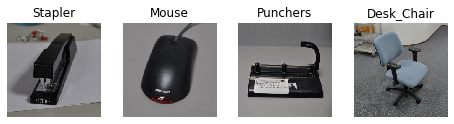

In [25]:
show_batch(ins['input_source'].numpy(), outs['preds'].numpy(), 4)

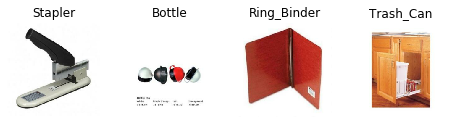

In [26]:
show_batch(ins['input_target'].numpy(), outs['preds_1'].numpy(), 4)

## Check picture values and preprocessing effect

In [28]:
# pic = tf.compat.v2.keras.preprocessing.image.load_img('datasets/Office31/amazon/images/back_pack/frame_0001.jpg', target_size=(224, 224))
# pic = tf.compat.v2.keras.preprocessing.image.img_to_array(pic)
pic = ins['input_target'][0]*255

tf.compat.v2.keras.applications.vgg16.preprocess_input(pic, mode='tf')
pic = pic.numpy()
pic.min(), pic.mean(), pic.max()

(8.0807495, 216.43834, 255.0)

## Check augmentation

In [29]:
ai = iter(dsg.augment(dsg.prep_ds_train(ds['source']['train']['ds'])))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

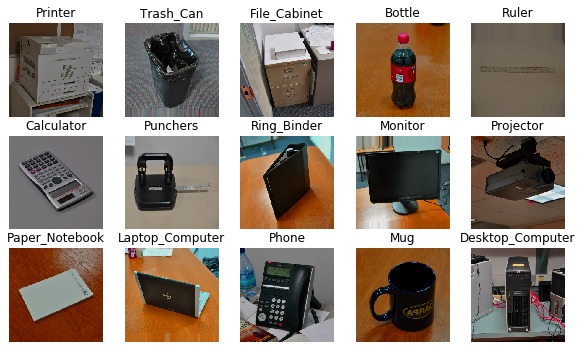

In [30]:
image_batch, label_batch = next(ai)
show_batch(image_batch.numpy(), label_batch.numpy())

In [31]:
ds_combo = dsg.da_pair_dataset(ds['source']['train']['ds'], ds['target']['train']['ds'], ratio=1, shuffle_buffer_size=5000)
ds_combo = ds_combo['ds']
ds_combo = dsg.prep_ds_train(ds_combo, batch_size=4)
aic = iter(dsg.augment_pair(ds_combo, batch_size=4))

In [34]:
ins, outs = next(aic)
s_dat, t_dat = ins['input_source'], ins['input_target']
s_lbl, t_lbl, ll = outs['preds'], outs['preds_1'], outs['aux_out']
ll.numpy()

array([ True,  True, False, False])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


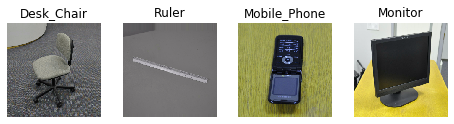

In [35]:
show_batch(s_dat.numpy(), s_lbl.numpy(), 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


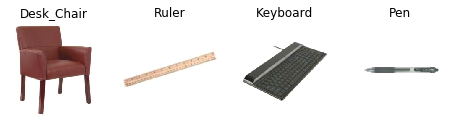

In [36]:
show_batch(t_dat.numpy(), t_lbl.numpy(), 4)